In [25]:
import xml.etree.ElementTree as ET
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
data = {}
markers = ['RASIS', 'LASIS', 'RPSIS', 'LPSIS', 'RTH1', 'RTH2', 'RTH3', 'RTH4', 'RFLE', 'RFAL', 'RSK1', 'RSK2', 'RSK4', 'RSK3', 'RFCC', 'RFMT1', 'RFMT2', 'RFMT5', 'LTH1', 'LTH2', 'LTH3', 'LTH4', 'LFLE', 'LSK1', 'LSK2', 'LSK4', 'LSK3', 'LFAL', 'LFCC', 'LFMT1', 'LFMT2', 'LFMT5']

In [ ]:

def extract_ik_weights(ik, markers = markers):

    info = {}
    # Print the full structure
    for file in ik:
        a=0
        b=0
        weight = {}
        tree = ET.parse(file)
        root = tree.getroot()
        while root[0][b].tag != 'IKTaskSet':
            b+=1
        while True:                
            try:
                if (root[0][b][0][a].attrib)["name"] in markers:
                    weight[(root[0][b][0][a].attrib)["name"]] = {root[0][b][0][a][1].tag:root[0][b][0][a][1].text,
                                                                        root[0][b][0][a][0].tag:root[0][b][0][a][0].text}
                a+=1
            except IndexError:
                break
            
        info[Path(file).name] = weight
    return info

In [ ]:

def plot_ik_weights_heatmap(info,subject):
    # 1. Transform your dictionary into a long-form DataFrame
    rows = []
    for trial, markers in info.items():
        trial_id = trial.replace('.xml', '').replace('ik_setup_', '')
        for marker, details in markers.items():
            rows.append({
                'Trial': trial_id,
                'Marker': marker,
                'Weight': float(details['weight'])
            })

    df = pd.DataFrame(rows)

    # 2. Pivot for the Heatmap
    pivot_df = df.pivot(index='Marker', columns='Trial', values='Weight')
    # pivot_df = pivot_df[['STW1', 'STW2', 'STW3', 'STW4', 'STW5']] # Ensure order

    # 3. Plotting the Heatmap
    plt.figure(figsize=(10, 12))
    sns.heatmap(pivot_df, annot=True, fmt='.0f', cmap='YlGnBu', cbar_kws={'label': 'Weight'})
    plt.title('Distribution of Marker Weights across IK Trials')
    plt.savefig(f'marker_weights_heatmaps{subject}.png')

    # 4. Plotting a Comparison for Key Markers
    # key_markers = ['RASIS', 'RPSIS', 'RTH1', 'RFLE', 'RFCC']
    # subset_df = df[df['Marker'].isin(key_markers)]

    # plt.figure(figsize=(10, 6))
    # sns.barplot(data=subset_df, x='Marker', y='Weight', hue='Trial')
    # plt.title('Comparison of Specific Marker Weights')
    # plt.ylabel('Weight Value')
    # plt.savefig('key_markers_weights_bar_s02.png')

In [ ]:

def plot_ik_weights_comparison(data):
    # Assuming 'data' contains subjects as top-level keys
    # Example format: {'Subject_01': {...}, 'Subject_02': {...}}

    rows = []
    for subject, setups in data.items():
        for setup_name, markers in setups.items():
            for marker, details in markers.items():
                rows.append({
                    'Subject': subject,
                    'Marker': marker,
                    'Weight': float(details['weight'])
                })

    df_comp = pd.DataFrame(rows)

    # Create a Box Plot to see the variance per marker across all subjects
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df_comp, x='Marker', y='Weight', palette='Set3')
    sns.stripplot(data=df_comp, x='Marker', y='Weight', color='black', alpha=0.3) # Show individual points
    plt.xticks(rotation=45)
    plt.title('Comparison of Marker Weights Across All Subjects')
    plt.ylabel('Weight Value')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig('marker_weights_comparison_all_subjects.png')
    plt.show()

In [ ]:

for subject in range(2,11):
    ik = [rf"d:\UG_Proj\Human Sitting to Walking Transitions\S{subject:02d}\IK\ik_setup_stw{trial}.xml" for trial in range(1,6)]
    info = extract_ik_weights(ik)
    # plot_ik_weights_heatmap(info,subject)
    data[f'Subject_{subject:02d}'] = info
    
    

In [ ]:
data.keys()

In [ ]:
plot_ik_weights_comparison(data)

In [ ]:
data["Subject_07"]["ik_setup_stw1.xml"]

In [ ]:
import opensim as osim
import os

In [ ]:
os.chdir(r"d:\UG_Proj\Human Sitting to Walking Transitions\S02")

In [ ]:
iktool = osim.InverseKinematicsTool(r"d:\UG_Proj\Human Sitting to Walking Transitions\S02\IK\ik_setup_STW1.xml")

In [ ]:
iktool.get_marker_file()

In [ ]:
iktool.run()

In [ ]:
from opensim import InverseKinematicsTool, Model
import os


os.chdir(r"d:\UG_Proj\Human Sitting to Walking Transitions\S02\IK") #already present
# Check current working directory
print(f"Current working directory: {os.getcwd()}")

# Load IK setup
ik_setup = "d:\\UG_Proj\\Human Sitting to Walking Transitions\\S02\\IK\\ik_setup_STW1.xml"
ik_tool = InverseKinematicsTool(ik_setup)

# Get the model file path it's using
model_file = ik_tool.get_model_file()
print(f"Model file (relative): {model_file}")

# Resolve to absolute path
abs_model_path = os.path.abspath(model_file)
print(f"Model file (absolute): {abs_model_path}")

# Check if file exists
if os.path.exists(abs_model_path):
    print(f"✓ File found: {abs_model_path}")
else:
    print(f"✗ File NOT found: {abs_model_path}")

# Run IK
# ik_tool.run()

In [ ]:
print("IK process completed.")

In [ ]:
import opensim as osm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Setup Paths and Model ---
model_path = r'd:\UG_Proj\Human Sitting to Walking Transitions\S01\scale\subject01_simbody_scaled.osim'
ik_file = r'd:\UG_Proj\Human Sitting to Walking Transitions\S01\IK\results_stw\ik_output_s01_stw1.mot' # Replace with your IK file name
output_dir = './analysis_results'

model = osm.Model(model_path)
model.initSystem()

# --- 2. Define Point Kinematics Analysis ---
# We assume the RLCC and LLCC are the markers you want to track.
# If they are not in the model, we use the center of the calcaneus bodies.
bodies_to_analyze = ['calcn_r', 'calcn_l']
marker_names = ['RFCC', 'LFCC']

# Create the PointKinematics analysis
pk = osm.PointKinematics(model)
pk.setStartTime(0) # Adjust based on your IK data start time
pk.setEndTime(5)  # Adjust based on your IK data end time

# For each marker, we define its body and local position
# Here we use 0,0,0 as the local origin of the calcaneus bodies
for (body_name,marker_name) in (bodies_to_analyze,marker_names):
    pk.setBody(model.getBodySet().get(body_name))
    pk.setPoint(osm.Vec3(0, 0, 0)) # Point in local body frame
    pk.setPointName(marker_name)

model.addAnalysis(pk)

# --- 3. Run Analysis Tool ---
analyze = osm.AnalyzeTool()
analyze.setModel(model)
analyze.setStatesFileName(ik_file)
analyze.setResultsDir(output_dir)
analyze.run()

print("Point Acceleration analysis complete. Files saved in:", output_dir)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def calculate_marker_acceleration(trc_path, output_csv='marker_accelerations.csv', cutoff_freq=6.0):
    # 1. Load TRC file
    # We read the headers carefully to find RFCC and LFCC
    with open(trc_path, 'r') as f:
        lines = f.readlines()
    
    # Marker names are usually on line 3, components (X, Y, Z) on line 4
    marker_names = lines[3].split('\t')
    print(marker_names)
    
    # Find the column index for RFCC and LFCC
    # TRC format: Frame (0), Time (1), M1_X (2), M1_Y (3), M1_Z (4)...
    rfcc_idx = -1
    lfcc_idx = -1
    
    current_col = 2
    for m in marker_names:
        m = m.strip()
        if m == 'RFCC': rfcc_idx = current_col
        if m == 'LFCC': lfcc_idx = current_col
        if m: current_col += 3 # Each marker has 3 columns (X, Y, Z)

    if rfcc_idx == -1 or lfcc_idx == -1:
        raise ValueError("RFCC or LFCC markers not found in the TRC file.")

    # 2. Load the numerical data
    data = pd.read_csv(trc_path, sep='\t', skiprows=5, header=None)
    time = data.iloc[:, 1].values
    fs = 1.0 / np.mean(np.diff(time)) # Sampling frequency
    
    # Extract X, Y, Z for both markers
    rfcc_pos = data.iloc[:, rfcc_idx:rfcc_idx+3].values
    lfcc_pos = data.iloc[:, lfcc_idx:lfcc_idx+3].values

    # 3. Filter the Position Data (Butterworth Low-pass)
    # This is mandatory; differentiating raw noise creates huge errors.
    b, a = butter(4, cutoff_freq / (fs / 2), btype='low')
    rfcc_filt = filtfilt(b, a, rfcc_pos, axis=0)
    lfcc_filt = filtfilt(b, a, lfcc_pos, axis=0)

    # 4. Differentiate twice to get Acceleration (m/s^2)
    # Velocity
    rfcc_vel = np.gradient(rfcc_filt, time, axis=0)
    lfcc_vel = np.gradient(lfcc_filt, time, axis=0)
    # Acceleration
    rfcc_acc = np.gradient(rfcc_vel, time, axis=0)
    lfcc_acc = np.gradient(lfcc_vel, time, axis=0)

    # 5. Determine which leg steps first
    # We look for the first peak in Vertical (Y) acceleration (index 1)
    # A threshold of 0.5 m/s^2 is usually enough to detect movement
    threshold = 2
    r_start_idx = np.where(np.abs(rfcc_acc[:, 1]) > threshold)[0][0]
    l_start_idx = np.where(np.abs(lfcc_acc[:, 1]) > threshold)[0][0]
    
    first_leg = "Right (RFCC)" if r_start_idx < l_start_idx else "Left (LFCC)"
    print(f"The {first_leg} leg starts moving first at {time[min(r_start_idx, l_start_idx)]:.3f}s")

    # 6. Save and Plot
    results = pd.DataFrame({
        'time': time,
        'RFCC_Acc_Y': rfcc_acc[:, 1],
        'LFCC_Acc_Y': lfcc_acc[:, 1]
    })
    results.to_csv(output_csv, index=False)
    
    plt.figure(figsize=(10, 5))
    plt.plot(time, rfcc_acc[:, 1], label='RFCC (Right) Vertical Accel')
    plt.plot(time, lfcc_acc[:, 1], label='LFCC (Left) Vertical Accel')
    plt.axvline(time[r_start_idx], color='blue', linestyle='--', alpha=0.5, label='R-Start')
    plt.axvline(time[l_start_idx], color='red', linestyle='--', alpha=0.5, label='L-Start')
    plt.title('Heel Marker Vertical Acceleration')
    plt.ylabel('Acceleration ($m/s^2$)')
    plt.xlabel('Time (s)')
    plt.legend()
    plt.savefig('heel_acceleration_plot.png')
    
    return results

# To run:
dfs = calculate_marker_acceleration(r'd:\UG_Proj\Human Sitting to Walking Transitions\S02\ExpData\Mocap\trcResults\stw3.trc')

In [ ]:
import xml.etree.ElementTree as ET

def extract_muscle_max_force(osim_xml_path):
    """
    Reads an OpenSim XML (.osim) file and returns a list of
    (muscle_name, max_isometric_force).
    """
    tree = ET.parse(osim_xml_path)
    root = tree.getroot()

    muscles = []

    # Iterate over all Thelen2003Muscle elements
    for muscle in root.iter('Thelen2003Muscle'):
        name = muscle.attrib.get('name', 'UNKNOWN')

        max_force_elem = muscle.find('max_isometric_force')
        if max_force_elem is not None:
            max_iso = float(max_force_elem.text)
            minimum_activation = muscle.findtext('minimum_activation')

        muscles.append({
            "name": name,
            "max_isometric_force": float(max_iso) if max_iso else None,
            "minimum_activation": float(minimum_activation) if minimum_activation else None
        })

    return muscles


# Example usage
osim_file = r"c:\Users\Ritesh Aditya\Documents\OpenSim\4.5\Models\Gait2392_Simbody\gait2392_simbody.osim"
muscle_list = extract_muscle_max_force(osim_file)

for muscle in muscle_list:
    print(f"{muscle['name']:20s}  {muscle['max_isometric_force']:8.1f} N {muscle['minimum_activation']} m")
import csv
with open("muscle_max_forces_gait2392.csv", "w", newline="") as f:
    writer = csv.DictWriter(
        f,
        fieldnames=["name", "max_isometric_force", "minimum_activation"]
    )
    writer.writeheader()
    writer.writerows(muscle_list)

In [ ]:
import xml.etree.ElementTree as ET

def extract_muscle_max_force(osim_xml_path):
    """
    Reads an OpenSim XML (.osim) file and returns a list of
    (muscle_name, max_isometric_force).
    """
    tree = ET.parse(osim_xml_path)
    root = tree.getroot()

    muscles = []

    # Iterate over all Thelen2003Muscle elements
    for muscle in root.iter('Millard2012EquilibriumMuscle'):
        name = muscle.attrib.get('name', 'UNKNOWN')

        max_force_elem = muscle.find('max_isometric_force')
        if max_force_elem is not None:
            max_iso = float(max_force_elem.text)
            minimum_activation = muscle.findtext('minimum_activation')

        muscles.append({
            "name": name,
            "max_isometric_force": float(max_iso) if max_iso else None,
            "minimum_activation": float(minimum_activation) if minimum_activation else None
        })

    return muscles


# Example usage
osim_file = r"d:\student\MTech\Sakshi\STW\model\RajagopalLa2023_LL-stw_adjustedWieghts.osim"
muscle_list = extract_muscle_max_force(osim_file)
print("Muscle Max Isometric Forces from RajagopalLa2023_LL-stw_adjustedWieghts.osim:")
for muscle in muscle_list:
    print(f"{muscle['name']:20s}  {muscle['max_isometric_force']:8.1f} N {muscle['minimum_activation']} m")


import csv
with open("muscle_max_forces_rajagopal.csv", "w", newline="") as f:
    writer = csv.DictWriter(
        f,
        fieldnames=["name", "max_isometric_force", "minimum_activation"]
    )
    writer.writeheader()
    writer.writerows(muscle_list)

In [ ]:
import xml.etree.ElementTree as ET

def extract_muscle_max_force(osim_xml_path):
    """
    Reads an OpenSim XML (.osim) file and returns a list of
    (muscle_name, max_isometric_force).
    """
    tree = ET.parse(osim_xml_path)
    root = tree.getroot()

    muscles = []

    # Iterate over all Thelen2003Muscle elements
    for muscle in root.iter('Millard2012EquilibriumMuscle'):
        name = muscle.attrib.get('name', 'UNKNOWN')

        max_force_elem = muscle.find('max_isometric_force')
        if max_force_elem is not None:
            max_iso = float(max_force_elem.text)
            minimum_activation = muscle.findtext('minimum_activation')

        muscles.append({
            "name": name,
            "max_isometric_force": float(max_iso) if max_iso else None,
            "minimum_activation": float(minimum_activation) if minimum_activation else None
        })

    return muscles


# Example usage
osim_file = r"d:\student\MTech\Sakshi\STW\S01\scale\subject01_simbody_scaled.osim"
muscle_list_1 = extract_muscle_max_force(osim_file)
print("Muscle Max Isometric Forces from subject01_simbody_scaled.osim:")
for muscle in muscle_list:
    print(f"{muscle['name']:20s}  {muscle['max_isometric_force']:8.1f} N {muscle['minimum_activation']} m")


import csv
with open("muscle_max_forces_rajagopal.csv", "w", newline="") as f:
    writer = csv.DictWriter(
        f,
        fieldnames=["name", "max_isometric_force", "minimum_activation"]
    )
    writer.writeheader()
    writer.writerows(muscle_list)

In [ ]:
muscle_list_1 == muscle_list

In [ ]:
import opensim as osm

# --- CONFIGURATION ---
input_model_file = r"d:\student\MTech\Sakshi\STW\S01\scale\subject01_simbody_scaled.osim"
output_model_file = r"d:\student\MTech\Sakshi\STW\S01\scale\subject01_simbody_scaled_stronger.osim"
strength_scale_factor = 1.5  # Increase strength by 50%

# Load the model
model = osm.Model(input_model_file)
muscle_set = model.getMuscles()

print(f"Scaling {muscle_set.getSize()} muscles by a factor of {strength_scale_factor}...")

# Iterate through muscles and multiply max_isometric_force
for i in range(muscle_set.getSize()):
    muscle = muscle_set.get(i)
    current_force = muscle.get_max_isometric_force()
    new_force = current_force * strength_scale_factor
    muscle.set_max_isometric_force(new_force)

# Save the modified model
model.printToXML(output_model_file)

print(f"Success! New model saved as {output_model_file}")

# smoothing grf

Saved filtered .mot to: d:\student\MTech\test\Mocap\grfResults\stw4_filtered.mot


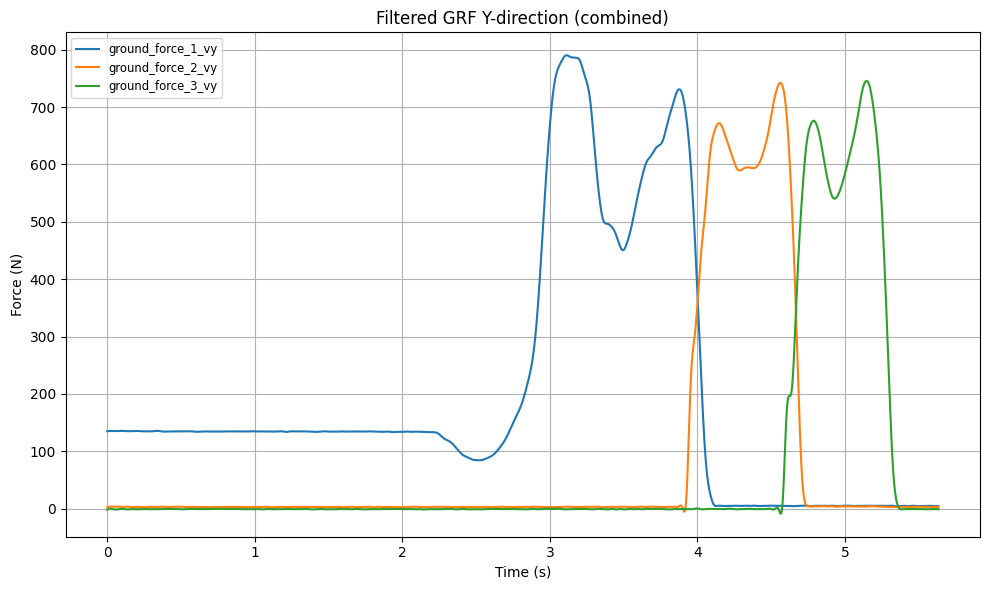

In [ ]:
import re
import os
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

def read_mot_with_header(path):
    with open(path, 'r') as f:
        lines = f.readlines()
    # find endheader index
    header_idx = next((i for i,l in enumerate(lines) if 'endheader' in l.lower()), None)
    if header_idx is None:
        raise ValueError("No 'endheader' found in file")
    header_lines = lines[:header_idx+1]      # include the 'endheader' line
    colnames_line = lines[header_idx+1].rstrip("\n")
    # load data (pandas will use the next line as column names)
    df = pd.read_csv(path, sep=r'\s+', engine='python', skiprows=header_idx+1)
    return header_lines, colnames_line, df

def detect_y_columns(df):
    cols = []
    for c in df.columns:
        low = c.lower()
        if re.search(r'(_vy$|_fy$|vy$|fy$)', low) or ('ground_force' in low and 'vy' in low):
            cols.append(c)
    return cols

def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyq = 0.5 * fs
    wn = cutoff / nyq
    b, a = butter(order, wn, btype='low')
    return filtfilt(b, a, data, axis=0)

def filter_and_save_mot(in_path,
                        out_path=None,
                        cutoff=20.0,
                        order=4,
                        fs=None,
                        fs_fallback=1000.0,
                        columns=None,
                        plot=False):
    """
    Read `in_path` (.mot/.sto), low-pass filter Y-GRF columns, and save to `out_path`
    preserving the original header and column-label line.
    If out_path is None, a new file `<inname>_filtered.mot` is created next to input.
    """
    header_lines, colnames_line, df = read_mot_with_header(in_path)

    if columns is None:
        columns = detect_y_columns(df)
    if not columns:
        raise ValueError("No Y-direction GRF columns detected. Provide `columns=` explicitly.")

    # estimate fs if not provided
    time_col = next((c for c in df.columns if c.lower() == 'time'), df.columns[0])
    time = df[time_col].values
    if fs is None:
        if len(time) >= 2:
            dt = np.mean(np.diff(time))
            fs = 1.0 / dt
        else:
            fs = fs_fallback

    # prepare numeric matrix and filter
    data_mat = df[columns].astype(float).values
    filtered_mat = butter_lowpass_filter(data_mat, cutoff=cutoff, fs=fs, order=order)

    # place filtered values back into dataframe copy
    df_filt = df.copy()
    df_filt.loc[:, columns] = filtered_mat

    # choose output path
    if out_path is None:
        base, ext = os.path.splitext(in_path)
        out_path = base + '_filtered' + (ext if ext else '.mot')

    # write header + original column label line + filtered data (no pandas header)
    with open(out_path, 'w', newline='\n') as f:
        f.writelines(header_lines)
        f.write(colnames_line + '\n')
    # append data without header (tab-separated for readability)
    df_filt.to_csv(out_path, sep='\t', index=False, header=False, float_format='%.6f', mode='a')
    print(f"Saved filtered .mot to: {out_path}")

    if plot:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10,6))
        for c in columns:
            plt.plot(time, df_filt[c].values, label=c)
        plt.xlabel('Time (s)')
        plt.ylabel('Force (N)')
        plt.title('Filtered GRF Y-direction (combined)')
        plt.legend(fontsize='small')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return df_filt, out_path

# Example usage:
in_mot = r'd:\student\MTech\test\Mocap\grfResults\stw4.mot'
df_filtered, out_file = filter_and_save_mot(in_mot, cutoff=20, order=4, plot=True)

In [ ]:
import opensim as osim
import os

os.chdir(r"D:\student\MTech\test") #already present
so_analysis = osim.AnalyzeTool("so_setup_s01_stw4.xml")
so_analysis.setResultsDir(r"D:\student\MTech\test\output")
so_analysis.run()

muscle force filtered

columnnames: ['time', 'addbrev_r', 'addlong_r', 'addmagDist_r', 'addmagIsch_r', 'addmagMid_r', 'addmagProx_r', 'bflh_r', 'bfsh_r', 'edl_r', 'ehl_r', 'fdl_r', 'fhl_r', 'gaslat_r', 'gasmed_r', 'glmax1_r', 'glmax2_r', 'glmax3_r', 'glmed1_r', 'glmed2_r', 'glmed3_r', 'glmin1_r', 'glmin2_r', 'glmin3_r', 'grac_r', 'iliacus_r', 'perbrev_r', 'perlong_r', 'piri_r', 'psoas_r', 'recfem_r', 'sart_r', 'semimem_r', 'semiten_r', 'soleus_r', 'tfl_r', 'tibant_r', 'tibpost_r', 'vasint_r', 'vaslat_r', 'vasmed_r', 'addbrev_l', 'addlong_l', 'addmagDist_l', 'addmagIsch_l', 'addmagMid_l', 'addmagProx_l', 'bflh_l', 'bfsh_l', 'edl_l', 'ehl_l', 'fdl_l', 'fhl_l', 'gaslat_l', 'gasmed_l', 'glmax1_l', 'glmax2_l', 'glmax3_l', 'glmed1_l', 'glmed2_l', 'glmed3_l', 'glmin1_l', 'glmin2_l', 'glmin3_l', 'grac_l', 'iliacus_l', 'perbrev_l', 'perlong_l', 'piri_l', 'psoas_l', 'recfem_l', 'sart_l', 'semimem_l', 'semiten_l', 'soleus_l', 'tfl_l', 'tibant_l', 'tibpost_l', 'vasint_l', 'vaslat_l', 'vasmed_l', 'FX', 'FY', 'FZ', 'MX', 

ValueError: Format 'sto' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)

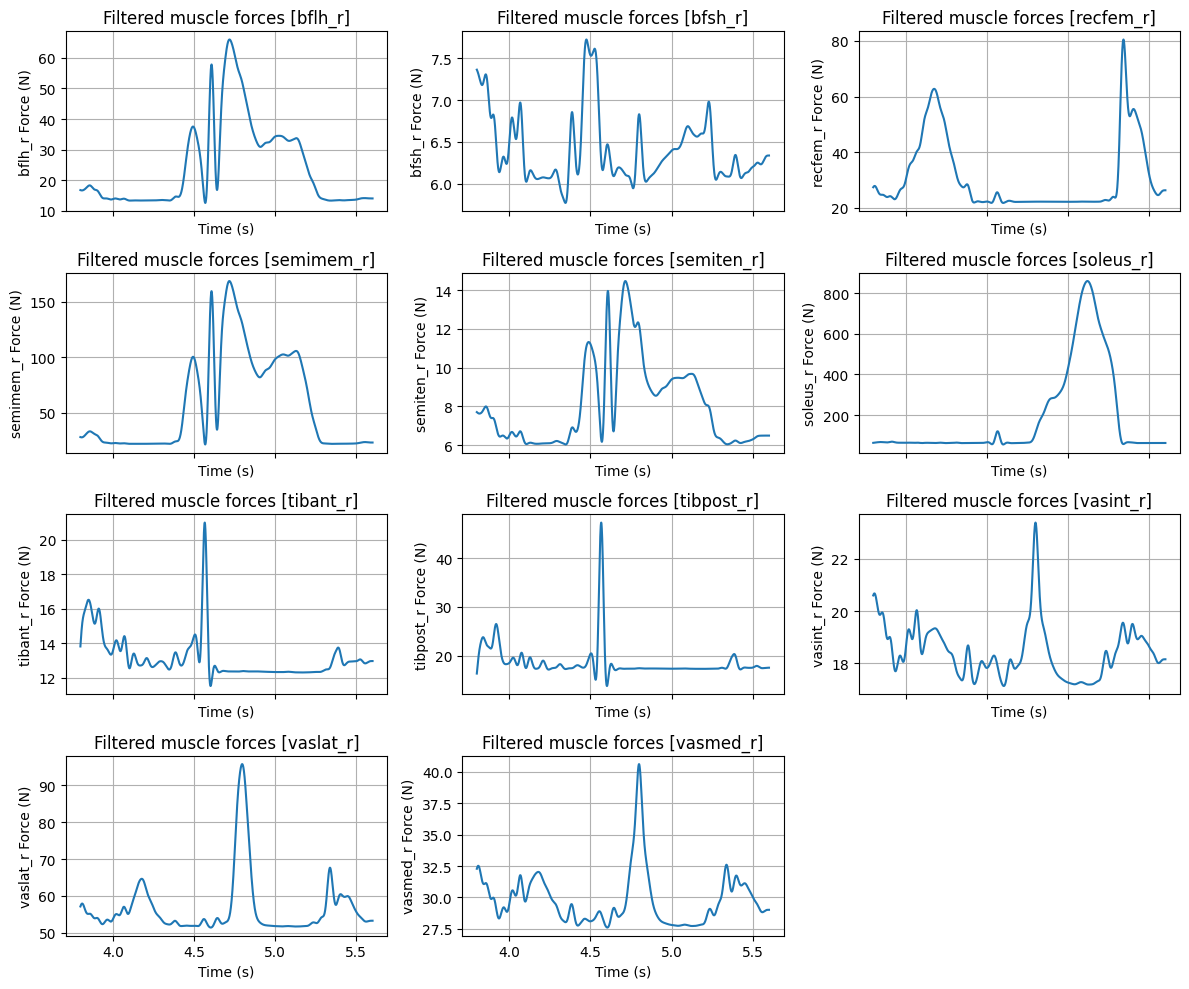

In [ ]:
import re
import os
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

def read_mot_with_header(path):
    with open(path, 'r') as f:
        lines = f.readlines()
    # find endheader index
    header_idx = next((i for i,l in enumerate(lines) if 'endheader' in l.lower()), None)
    if header_idx is None:
        raise ValueError("No 'endheader' found in file")
    header_lines = lines[:header_idx+1]      # include the 'endheader' line
    colnames_line = lines[header_idx+1].rstrip("\n")
    # load data (pandas will use the next line as column names)
    df = pd.read_csv(path, sep=r'\s+', engine='python', skiprows=header_idx+1)
    return header_lines, colnames_line, df

def detect_y_columns(df):
    cols = []
    for c in df.columns:
        low = c.lower()
        if re.search(r'(_vy$|_fy$|vy$|fy$)', low) or ('ground_force' in low and 'vy' in low):
            cols.append(c)
    return cols

def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyq = 0.5 * fs
    wn = cutoff / nyq
    b, a = butter(order, wn, btype='low')
    return filtfilt(b, a, data, axis=0)

def filter_and_save_mot(in_path,
                        out_path=None,
                        cutoff=20.0,
                        order=4,
                        fs=None,
                        fs_fallback=250.0,
                        columns=None,
                        plot=False):
    """
    Read `in_path` (.mot/.sto), low-pass filter Y-GRF columns, and save to `out_path`
    preserving the original header and column-label line.
    If out_path is None, a new file `<inname>_filtered.mot` is created next to input.
    """
    header_lines, colnames_line, df = read_mot_with_header(in_path)
    print(f"columnnames: {df.columns.tolist()}")

    if columns is None:
        columns = detect_y_columns(df)
    if not columns:
        raise ValueError("No Y-direction GRF columns detected. Provide `columns=` explicitly.")

    # estimate fs if not provided
    time_col = next((c for c in df.columns if c.lower() == 'time'), df.columns[0])
    time = df[time_col].values
    if fs is None:
        if len(time) >= 2:
            dt = np.mean(np.diff(time))
            fs = 1.0 / dt
        else:
            fs = fs_fallback
    columne = df.columns.tolist()
    # prepare numeric matrix and filter
    data_mat = df[columne].astype(float).values
    filtered_mat = butter_lowpass_filter(data_mat, cutoff=cutoff, fs=fs, order=order)

    # place filtered values back into dataframe copy
    df_filt = df.copy()
    df_filt.loc[:, columne] = filtered_mat

    # choose output path
    if out_path is None:
        base, ext = os.path.splitext(in_path)
        out_path = base + '_filtered' + (ext if ext else '.mot')

    # write header + original column label line + filtered data (no pandas header)
    with open(out_path, 'w', newline='\n') as f:
        f.writelines(header_lines)
        f.write(colnames_line + '\n')
    # append data without header (tab-separated for readability)
    df_filt.to_csv(out_path, sep='\t', index=False, header=False, float_format='%.6f', mode='a')
    print(f"Saved filtered .mot to: {out_path}")

    if plot:
        import matplotlib.pyplot as plt
        import math
        # create grid of subplots
        n = len(columns)
        if n == 0:
            print('No columns to plot')
        else:
            ncols = min(3, n)
            nrows = math.ceil(n / ncols)
            fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 4, max(2.5, nrows * 2.5)), sharex=True)

            # robustly flatten axes into a list of Axes objects
            if isinstance(axes, np.ndarray):
                axes_flat = axes.ravel().tolist()
            elif isinstance(axes, (list, tuple)):
                axes_flat = []
                for row in axes:
                    if isinstance(row, (list, tuple, np.ndarray)):
                        axes_flat.extend(list(row))
                    else:
                        axes_flat.append(row)
            else:
                axes_flat = [axes]

            for ax, c in zip(axes_flat, columns):
                ax.plot(time, df_filt[c].values)
                ax.set_xlabel('Time (s)')
                ax.set_ylabel(f'{c} Force (N)')
                ax.set_title(f'Filtered muscle forces [{c}]')
                ax.grid(True)

            # hide any unused axes
            for ax in axes_flat[len(columns):]:
                try:
                    ax.set_visible(False)
                except Exception:
                    pass

            plt.tight_layout()
            plt.savefig(f'filtered_muscle_forces_{os.path.basename(out_path)}')
            plt.show()

    return df_filt, out_path


in_mot = r'd:\student\MTech\test\output\subject01_StaticOptimization_force.sto'
df_filtered, out_file = filter_and_save_mot(in_mot, cutoff=20, order=4, plot=True, columns=['bflh_r','bfsh_r','recfem_r','semimem_r','semiten_r','soleus_r','tibant_r','tibpost_r','vasint_r','vaslat_r','vasmed_r'])
# df_filtered, out_file = filter_and_save_mot(in_mot, cutoff=20, order=4, plot=True, columns= ['bflh_l','bfsh_l','gaslat_l','gasmed_l','glmax1_l','glmax2_l','glmax3_l','glmed1_l','glmed2_l','glmed3_l','recfem_l','semimem_l','semiten_l','soleus_l','tibant_l','tibpost_l','vasint_l','vaslat_l','vasmed_l'])

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# =====================================================
# FILE PATHS
# =====================================================
EMG_FILE = "d:\student\MTech\test\EMG and IMU\stw4.csv"
MVC_HAM = "d:\student\MTech\test\EMG and IMU\mvc_hamstrings.csv"
MVC_QUAD = "d:\student\MTech\test\EMG and IMU\mvc_quadriceps.csv"
MVC_SHANK = "d:\student\MTech\test\EMG and IMU\mvc_shank.csv"



OSError: [Errno 22] Invalid argument: 'd:\\student\\MTech\test\\EMG and IMU\\stw4.csv'

In [ ]:
# =====================================================
# SEMG ENVELOPE FUNCTION
# =====================================================
def semg_envelope(signal, fs):
    signal = pd.to_numeric(signal, errors="coerce").dropna().values

    b_bp, a_bp = butter(2, [20/(fs/2), 400/(fs/2)], btype="band")
    emg_bp = filtfilt(b_bp, a_bp, signal)

    emg_rect = np.abs(emg_bp)

    b_lp, a_lp = butter(2, 6/(fs/2), btype="low")
    emg_env = filtfilt(b_lp, a_lp, emg_rect)

    return emg_env



In [ ]:
# =====================================================
# LOAD TASK EMG FILE (labels in 2nd row)
# =====================================================
raw_emg = pd.read_csv(EMG_FILE, header=None, engine="python")

task_labels = raw_emg.iloc[1]

emg_cols, emg_names, emg_fs = [], [], []

for col, label in task_labels.items():
    if isinstance(label, str):
        match = re.search(r"\((\d+)Hz\)", label)
        if match:
            fs = int(match.group(1))
            if fs in [1259, 1778]:
                emg_cols.append(col)
                emg_names.append(label)
                emg_fs.append(fs)

emg_data = raw_emg.iloc[2:, emg_cols].apply(pd.to_numeric, errors="coerce")



In [ ]:
# =====================================================
# LOAD MVC FILES (labels in 6th row) F:
# =====================================================
def load_mvc(path):
    # Read the 6th row (index 5) as labels
    labels_df = pd.read_csv(path, skiprows=5, nrows=1, header=None, engine="python", delim_whitespace=True)
    labels = labels_df.iloc[0]

    # Convert labels to a list of strings, dropping any potential NaNs from the header row
    column_names_raw = [str(x) for x in labels.dropna().values]

    # Make column names unique by appending suffixes to duplicates
    seen_counts = {}
    unique_column_names = []
    for name in column_names_raw:
        original_name = name
        if original_name in seen_counts:
            seen_counts[original_name] += 1
            name = f"{original_name}.{seen_counts[original_name]}"
        else:
            seen_counts[original_name] = 1
        unique_column_names.append(name)

    # Read the data, skipping the first 6 rows (index 0-5)
    # Assign the unique labels as columns directly using the 'names' parameter
    data_df = pd.read_csv(path, skiprows=6, header=None, engine="python", delim_whitespace=True, names=unique_column_names)

    # Convert data to numeric
    data_df = data_df.apply(pd.to_numeric, errors="coerce")

    return labels, data_df

mvc_ham_labels, mvc_ham_data = load_mvc(MVC_HAM)
mvc_quad_labels, mvc_quad_data = load_mvc(MVC_QUAD)
mvc_shank_labels, mvc_shank_data = load_mvc(MVC_SHANK)



In [ ]:
# =====================================================
# GET MVC PEAK
# =====================================================
def get_mvc_peak(labels, data, muscle_name, fs):
    for col, label in labels.items():
        if isinstance(label, str) and muscle_name.lower() in label.lower():
            # Use the unique column name when accessing data
            unique_label = None
            # This assumes `labels` still contains original names from the file
            # and `data` has the unique_column_names. We need to find the corresponding unique name.
            if label in data.columns:
                unique_label = label
            else: # If the original label was duplicated and renamed, find its unique version
                for unique_col_name in data.columns:
                    if unique_col_name.startswith(f"{label}.") or unique_col_name == label:
                        unique_label = unique_col_name
                        break
            if unique_label:
                env = semg_envelope(data[unique_label], fs)
                return np.max(env)
    raise ValueError(f"MVC channel not found for {muscle_name}")



In [ ]:
# =====================================================
# MUSCLE GROUP MAPPING
# =====================================================
muscle_groups = {
    "Tibialis Anterior": "shank",
    "Gastrocnemius": "shank",
    "Rectus Femoris": "quadriceps",
    "Vastus": "quadriceps",
    "Biceps Femoris": "hamstrings",
    "Semitendinosus": "hamstrings"
}




In [ ]:
# =====================================================
# PROCESS & NORMALIZE EMG
# =====================================================
normalized_emg = {}

for col_idx, label, fs in zip(emg_cols, emg_names, emg_fs):

    env = semg_envelope(emg_data.iloc[:, emg_cols.index(col_idx)], fs)

    for muscle, group in muscle_groups.items():
        if muscle.lower() in label.lower():

            if group == "shank":
                mvc_peak = get_mvc_peak(mvc_shank_labels, mvc_shank_data, muscle, fs)
            elif group == "quadriceps":
                mvc_peak = get_mvc_peak(mvc_quad_labels, mvc_quad_data, muscle, fs)
            else:
                mvc_peak = get_mvc_peak(mvc_ham_labels, mvc_ham_data, muscle, fs)

            normalized_emg[muscle] = (env / mvc_peak) * 100


In [ ]:
# =====================================================
# PLOT
# =====================================================
plt.figure(figsize=(10, 6))

for muscle, signal in normalized_emg.items():
    time = np.linspace(0, len(signal)/fs, len(signal))
    plt.plot(time, signal, label=muscle)

plt.xlabel("Time (s)")
plt.ylabel("Muscle Activation (%MVC)")
plt.title("Normalized EMG Envelopes – Sit-to-Walk")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
